In [ ]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Algumas Estilizações
sns.set_palette("Set2")
%matplotlib inline

#Carga dos dados já tratados
df_usuario = pd.read_csv("dados_tratados/dim_usuario.csv")
df_feedback = pd.read_csv("dados_tratados/fato_feedback.csv")
df_final = pd.read_csv("dados_tratados/fato_final_aluno.csv")
df_frequencia = pd.read_csv("dados_tratados/fato_frequencia.csv")
df_cluster = pd.read_csv("dados_modelo/cluster_alunos.csv")
df_recomendacoes = pd.read_csv("dados_recomendacao/alunos_recomendacoes.csv")

In [23]:
#Análise Inicial dos dados carregados no DF
def resumo_inicial(df, nome):
    print(f"\n--- {nome} ---")
    print(df.shape)
    print(df.dtypes)
    print(df.isnull().sum())

resumo_inicial(df_usuario, "dim_usuario")
resumo_inicial(df_feedback, "fato_feedback")
resumo_inicial(df_final, "fato_final_aluno")
resumo_inicial(df_frequencia, "fato_frequencia")
resumo_inicial(df_cluster, "cluster_alunos")
resumo_inicial(df_recomendacoes, "alunos_recomendacoes")


--- dim_usuario ---
(2000, 8)
_id            object
id_usuario      int64
nome           object
idade           int64
genero         object
email          object
data_inicio    object
status         object
dtype: object
_id            0
id_usuario     0
nome           0
idade          0
genero         0
email          0
data_inicio    0
status         0
dtype: int64

--- fato_feedback ---
(12000, 6)
_id            object
id_feedback    object
id_usuario      int64
data           object
avaliacao       int64
comentario     object
dtype: object
_id            0
id_feedback    0
id_usuario     0
data           0
avaliacao      0
comentario     0
dtype: int64

--- fato_final_aluno ---
(2000, 22)
_id                   object
id_usuario             int64
nome                  object
idade                  int64
genero                object
email                 object
data_inicio           object
status                object
semanas_presentes      int64
ultima_frequencia     object
media_no

#### Distribuição de Alunos por Gênero e Idade

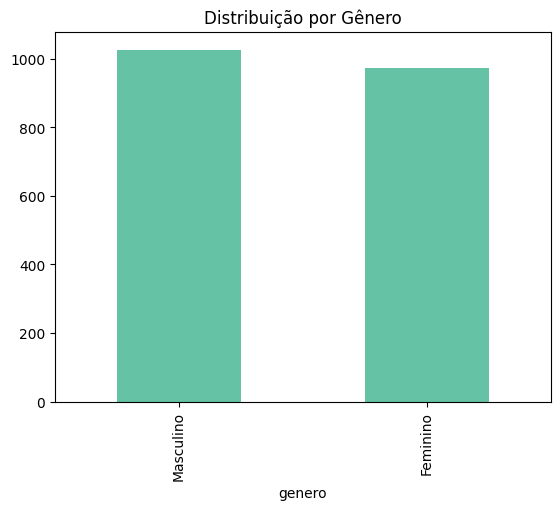

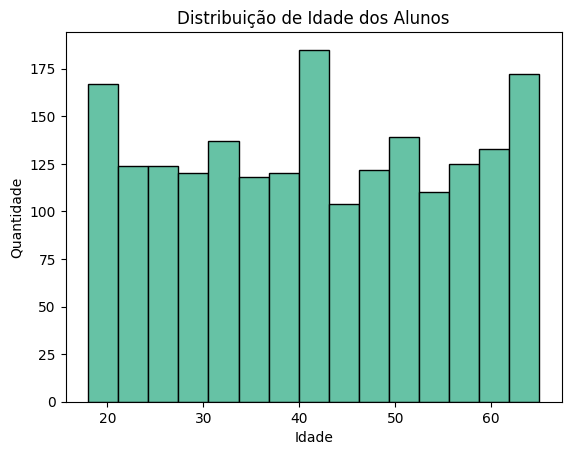

In [24]:
df_usuario['genero'].value_counts().plot(kind='bar', title='Distribuição por Gênero')
plt.show()

plt.hist(df_usuario['idade'], bins=15, edgecolor='black')
plt.title('Distribuição de Idade dos Alunos')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

#### Análise de Frequência na Academia

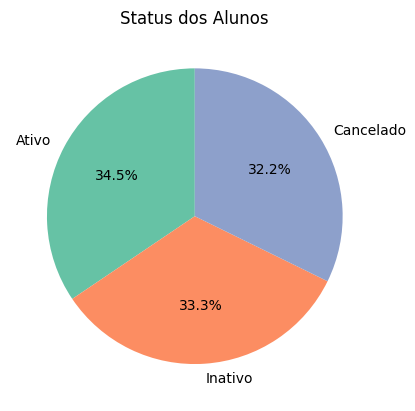

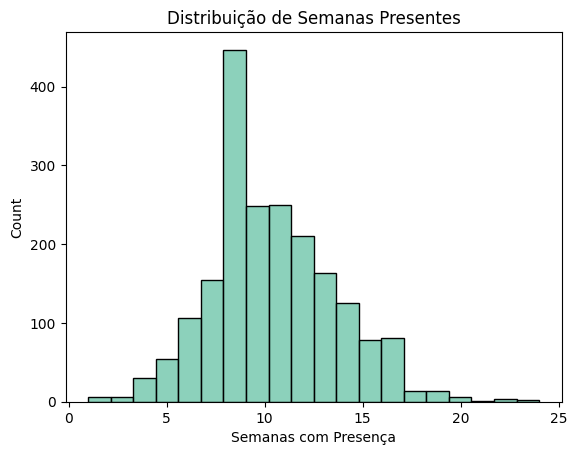

In [25]:
df_final['status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Status dos Alunos')
plt.ylabel('')
plt.show()

sns.histplot(df_final['semanas_presentes'], bins=20)
plt.title('Distribuição de Semanas Presentes')
plt.xlabel('Semanas com Presença')
plt.show()

#### Análise de Performance Física dos Alunos

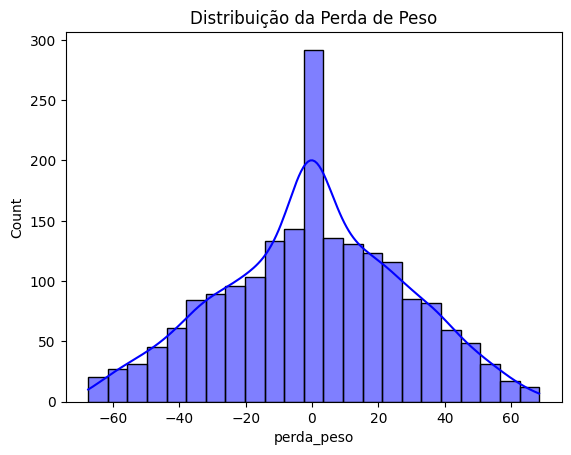

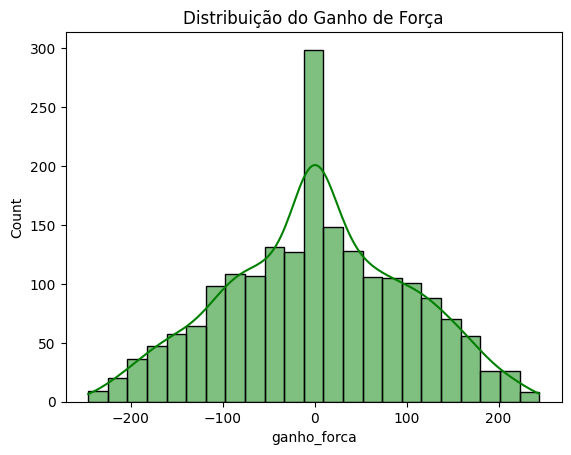

In [26]:
sns.histplot(df_final['perda_peso'], kde=True, color='blue')
plt.title('Distribuição da Perda de Peso')
plt.show()

sns.histplot(df_final['ganho_forca'], kde=True, color='green')
plt.title('Distribuição do Ganho de Força')
plt.show()



#### Correlação Entre Variáveis de Desempenho

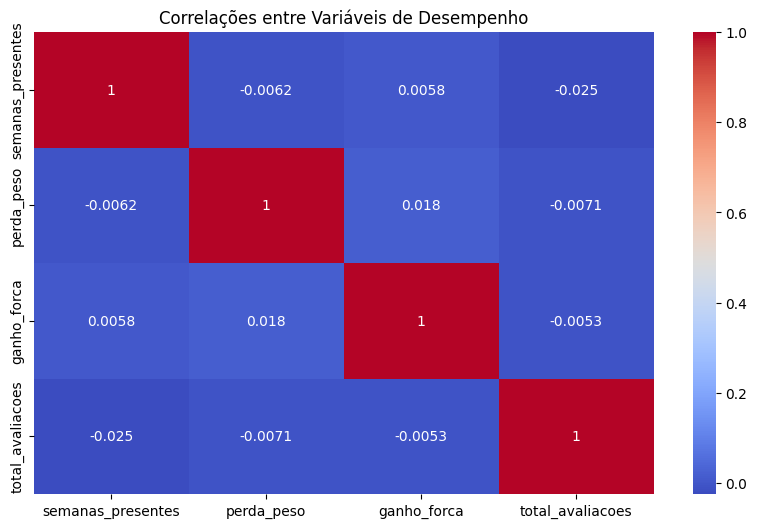

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df_final[['semanas_presentes', 'perda_peso', 'ganho_forca', 'total_avaliacoes']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlações entre Variáveis de Desempenho')
plt.show()



#### Análise de Feedbacks

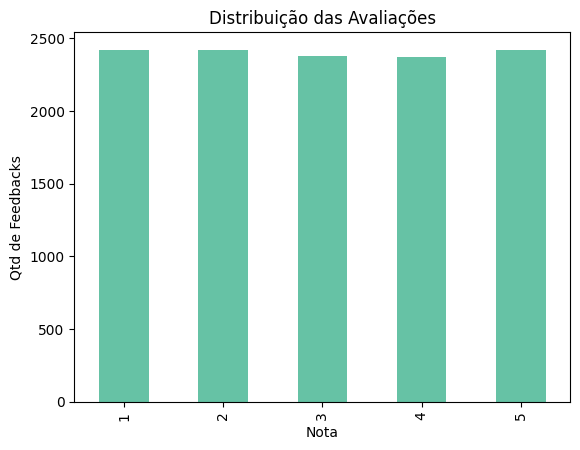

In [28]:
df_feedback['avaliacao'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição das Avaliações')
plt.xlabel('Nota')
plt.ylabel('Qtd de Feedbacks')
plt.show()



#### Análise dos Clusters

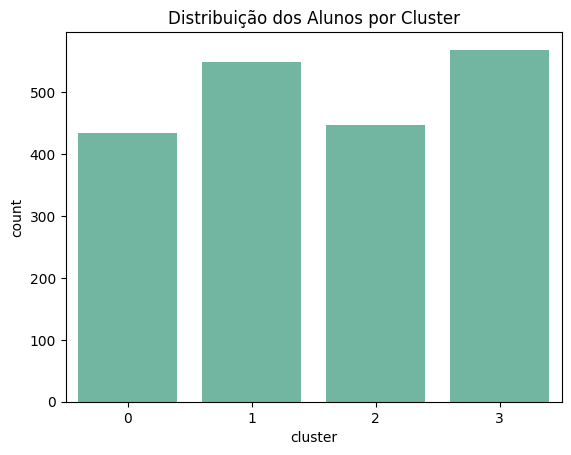

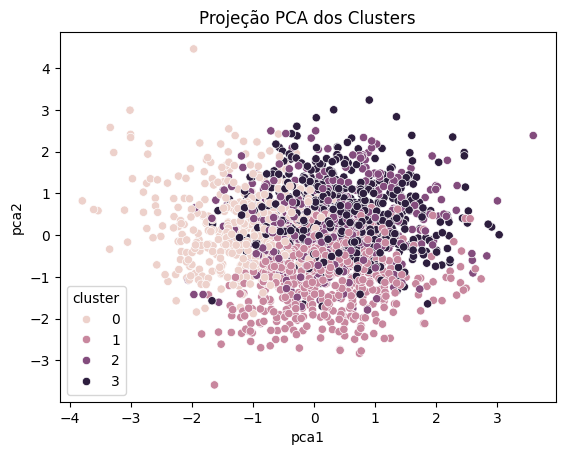

In [29]:
sns.countplot(x='cluster', data=df_cluster)
plt.title('Distribuição dos Alunos por Cluster')
plt.show()

sns.scatterplot(data=df_cluster, x='pca1', y='pca2', hue='cluster')
plt.title('Projeção PCA dos Clusters')
plt.show()



#### Recomendações para Perfis

In [30]:
recs_por_cluster = df_recomendacoes.groupby('cluster')['recomendacao'].first()
for cluster, recomendacao in recs_por_cluster.items():
    print(f"\n📌 Cluster {cluster}: {recomendacao}")


📌 Cluster 0: Intensifique o treino com metas mensais personalizadas.

📌 Cluster 1: Ofereça um período gratuito com personal trainer para aumentar o engajamento.

📌 Cluster 2: Reavalie o plano de treino e reforce acompanhamento nutricional.

📌 Cluster 3: Envie boas-vindas e lembretes das aulas semanais para manter o ritmo.


#### Perda de Peso Por Status na Academia

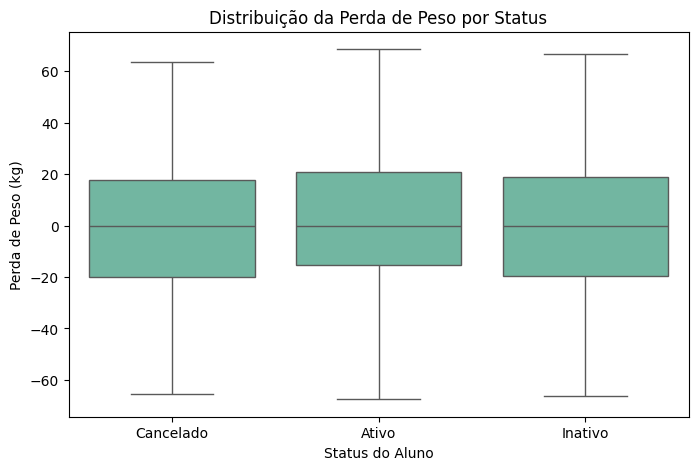

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='status', y='perda_peso', data=df_final)
plt.title('Distribuição da Perda de Peso por Status')
plt.xlabel('Status do Aluno')
plt.ylabel('Perda de Peso (kg)')
plt.show()
